<a href="https://colab.research.google.com/github/deathstar1/ballad-generator/blob/main/ballad-generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
from tensorflow.keras.layers  import Conv1D
from tensorflow.keras.layers  import MaxPooling1D
import numpy as np 

In [5]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt

data = open('/tmp/ballads.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

4799


In [29]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(250, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.04)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 24, 100)           479900    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 24, 500)           702000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 500)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 200)               560800    
_________________________________________________________________
dense_28 (Dense)             (None, 2399)              482199    
_________________________________________________________________
dense_29 (Dense)             (None, 4799)              11517600  
Total params: 13,742,499
Trainable params: 13,742,499
Non-trainable params: 0
_________________________________________

In [30]:
 history = model.fit(predictors, label, epochs=300, verbose=1 )

Epoch 1/300
853/853 [==============================] - 17s 16ms/step - loss: 8.2098 - accuracy: 0.0700
Epoch 2/300
853/853 [==============================] - 14s 16ms/step - loss: 6.5092 - accuracy: 0.0760
Epoch 3/300
853/853 [==============================] - 14s 16ms/step - loss: 6.3389 - accuracy: 0.0849
Epoch 4/300
853/853 [==============================] - 13s 16ms/step - loss: 6.1916 - accuracy: 0.1026
Epoch 5/300
853/853 [==============================] - 13s 16ms/step - loss: 6.0952 - accuracy: 0.1060
Epoch 6/300
853/853 [==============================] - 14s 16ms/step - loss: 5.9598 - accuracy: 0.1176
Epoch 7/300
853/853 [==============================] - 13s 16ms/step - loss: 5.8866 - accuracy: 0.1165
Epoch 8/300
853/853 [==============================] - 13s 16ms/step - loss: 5.8485 - accuracy: 0.1196
Epoch 9/300
853/853 [==============================] - 14s 16ms/step - loss: 5.7838 - accuracy: 0.1197
Epoch 10/300
853/853 [==============================] - 13s 16ms/step - l

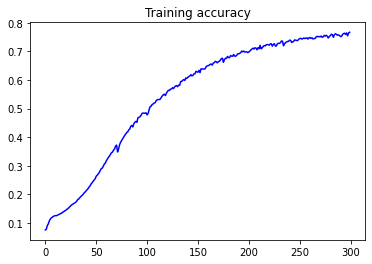

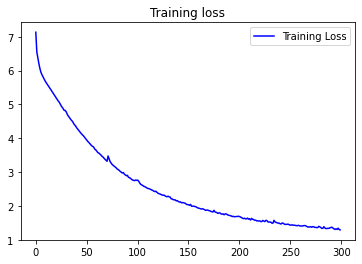

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "We know what we are but know not what we maybe"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


We know what we are but know not what we maybe know not naught was left with rumour ride down for those old gardener knows mighty terror mad mad rest break rest rest break fight last mad joy buried blue and joy lips peace peace peace peace — thanes other mad right on sleep all wing dare rest as england muffle her breast peace last and fight peace peace peace peace fire and joy lips last green mad sad hundred kings other god lips buried rest break fight rest peace and sin hand rest mighty mad mad right rest break fight fight peace peace and fight up athelney streams evening fast
